Apply LDA to classify spectral embeddings:
    
    Tools: scikit-learn 0.24.1


In [1]:
import os
#import gensim
#import pickle
#import time
#import sys
#import numpy as np
#import pandas as pd
from matplotlib import pyplot as plt
#from spec2vec.vector_operations import calc_vector
#from collections import OrderedDict, Counter

##  LDA

In [2]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split
#from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt 


In [3]:
import pandas as pd

### Loading array from files

In [4]:
## Loading embedding arrays
with open('/mnt/scratch/ding013/MS2ChemClass/embedding_arrays_for_classification/X_spectral_embeddings.csv') as file_name:
    X_embedding = np.loadtxt(file_name, delimiter=",")
print(X_embedding.shape)

(16360, 300)


In [5]:
## Loading class labels
import csv

with open('/mnt/scratch/ding013/MS2ChemClass/embedding_arrays_for_classification/y_npc_class_results_labels.csv') as file_name:
    csv_label = csv.reader(file_name)
    y_label_list = []
    for row in csv_label:
        y_label_list.append(row[0])
y_label = np.array(y_label_list)
print(y_label.shape)

(16360,)


## Perform LDA

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
#from sklearn.metrics import confusion_matrix
import numpy as np
#import matplotlib.pyplot as plt
#from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, random_projection, neighbors)

#### For training and test data

In [7]:
# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_embedding, y_label, test_size = 0.25, random_state = 0)

# Apply Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Apply LDA
t0=time.process_time()
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train,y_train)
t1=time.process_time()-t0
print('Time elapsed: %.3f' % t1)

# Predict the test set results and check the accuracy
y_pred = lda_model.predict(X_test)
accuracy_lda = accuracy_score(y_test,y_pred)
print('Accuracy: %.3f' % accuracy_lda)

################################################################3

# Re-apply LDA with only 2 features
lda_model = LinearDiscriminantAnalysis(n_components=2)
X_train2 = lda_model.fit_transform(X_train, y_train)
X_test2 = lda_model.transform(X_test)

t0=time.process_time()
lda_model2 = LinearDiscriminantAnalysis()
lda_model2.fit(X_train2,y_train)
t1=time.process_time()-t0
print('2-feature time elapsed: %.3f' % t1)
print(X_train2.shape)
print(X_test2.shape)
# Predict the test set results and check the accuracy
y_pred = lda_model2.predict(X_test2)
accuracy_lda = accuracy_score(y_test,y_pred)
print('2-feature accuracy: %.3f' % accuracy_lda)
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

Time elapsed: 106.393
Accuracy: 0.374
2-feature time elapsed: 11.659
(12270, 2)
(4090, 2)
2-feature accuracy: 0.236
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
conf_mat.shape
len(y_pred)

4090

#### For the whole data

In [9]:
# LDA

t0=time.process_time()
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_embedding,y_label)
t1=time.process_time()-t0
print('Time elapsed: %.3f' % t1)

# make a prediction
yhat = lda_model.predict([X_embedding[500]])
# sumarize prediction
print('class no. 500 is %s' % y_label[500])
print('Predicted Class: %s' % yhat)


Time elapsed: 102.368
class no. 500 is Unclassified
Predicted Class: ['Unclassified']


##### Cross validation

In [10]:
t0=time.process_time()

k=10
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lda_model, X_embedding, y_label, scoring='accuracy', cv=KFold(k))

t1=time.process_time()-t0
print('%d fold' % k)
print('Time elapsed: %.3f' % t1)
# summarize result
print('Mean Accuracy: %.3f (%.3f) \n' % (mean(scores), std(scores)))

10 fold
Time elapsed: 649.524
Mean Accuracy: 0.290 (0.079) 



In [11]:
## Try different K-folds
for i in range(20,21):

    t0=time.process_time()

    # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(lda_model, X_embedding, y_label, scoring='accuracy', cv=KFold(i))

    t1=time.process_time()-t0
    print('%d fold' % i)
    print('Time elapsed: ', t1)
    # summarize result
    print('Mean Accuracy: %.3f (%.3f) \n' % (mean(scores), std(scores)))

20 fold
Time elapsed:  1072.6938211320003
Mean Accuracy: 0.311 (0.112) 



## Take two major groups to do LDA again

In [12]:
# Define the data

select_lbs = ['Cyclic peptides','Simple coumarins']
select_index = []
for i in select_lbs:
    temp_index, = np.where(y_label==i)
    #print(temp_index)
    select_index += list(temp_index)
select_index.sort()
#print(select_index)

y_label_2_main = np.array(y_label[select_index])
print(y_label_2_main.shape)

X_embedding_2_lbs=X_embedding[select_index,:]
print(X_embedding_2_lbs.shape)

(1088,)
(1088, 300)


In [13]:
### perform LDA
# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_embedding_2_lbs, y_label_2_main, test_size = 0.25, random_state = 0)
# Apply Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Apply LDA
t0=time.process_time()
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train,y_train)
t1=time.process_time()-t0
print('Time elapsed: %.3f' % t1)

# Predict the test set results and check the accuracy
y_pred = lda_model.predict(X_test)
accuracy_lda = accuracy_score(y_test,y_pred)
print('Accuracy: %.3f' % accuracy_lda)
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

Time elapsed: 32.303
Accuracy: 0.904
[[112  14]
 [ 12 134]]


In [14]:
from collections import Counter
Counter(y_test)

Counter({'Simple coumarins': 146, 'Cyclic peptides': 126})

<AxesSubplot:xlabel='Predicted labels', ylabel='Actual labels'>

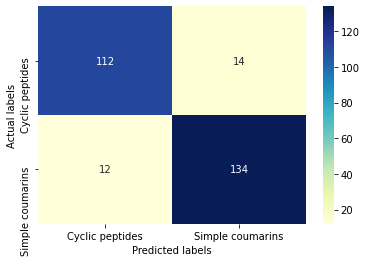

In [15]:
# Plot Confusion matrix

ax= plt.subplot()
df_cm = pd.DataFrame(conf_mat, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual labels'
df_cm.columns.name = 'Predicted labels'
# sns.set(font_scale=1.8)
sns.heatmap(df_cm, annot=True, ax = ax, cmap="YlGnBu", fmt='d',annot_kws={"size": 10})



## Take multi major groups to do LDA

In [16]:
# Select major groups
lbs = Counter(y_label)
lbs = {k:v for k,v in sorted(lbs.items(), key=lambda item: item[1], reverse=True)}
print(list(lbs.values())[1:31])
select_lbs = list(lbs.keys())[1:31]
print(select_lbs)

[557, 531, 394, 299, 279, 271, 259, 252, 247, 221, 221, 206, 182, 169, 167, 157, 153, 150, 145, 137, 129, 128, 127, 120, 113, 109, 109, 108, 103, 103]
['Cyclic peptides', 'Simple coumarins', 'Pyridine alkaloids', 'Dipeptides', 'Flavones', 'Flavonols', 'Oleanane triterpenoids', 'Carboline alkaloids', 'Triacylglycerols', 'Aminoacids', 'Glycerophosphocholines', 'Isoquinoline alkaloids', 'Cinnamic acids and derivatives', 'Linear peptides', 'Cholane steroids', 'Isoflavones', 'Carotenoids (C40', 'Chalcones', 'Iridoids monoterpenoids', 'Corynanthe type', 'Flavanones', 'Simple indole alkaloids', 'Pregnane steroids', 'Simple phenolic acids', 'Piperidine alkaloids', 'Tripeptides', 'Phenylalanine-derived alkaloids', 'N-acyl amines', 'Anthraquinones and anthrones', 'Furocoumarins']


In [17]:
# Define the data

select_index = []
for i in select_lbs:
    temp_index, = np.where(y_label==i)
    #print(temp_index)
    select_index += list(temp_index)
select_index.sort()
#print(select_index)

y_label_2_main = np.array(y_label[select_index])
print(y_label_2_main.shape)

X_embedding_2_lbs=X_embedding[select_index,:]
print(X_embedding_2_lbs.shape)

(6146,)
(6146, 300)


In [18]:
### Perform LDA
# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_embedding_2_lbs, y_label_2_main, test_size = 0.25, random_state = 0)
# Apply Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Apply LDA
t0=time.process_time()
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train,y_train)
t1=time.process_time()-t0
print('Time elapsed: %.3f' % t1)

# Predict the test set results and check the accuracy
y_pred = lda_model.predict(X_test)
accuracy_lda = accuracy_score(y_test,y_pred)
print('Accuracy: %.3f' % accuracy_lda)
conf_mat = confusion_matrix(y_test,y_pred)
#print(conf_mat.shape)

Time elapsed: 29.245
Accuracy: 0.528


<AxesSubplot:xlabel='Predicted labels', ylabel='Actual labels'>

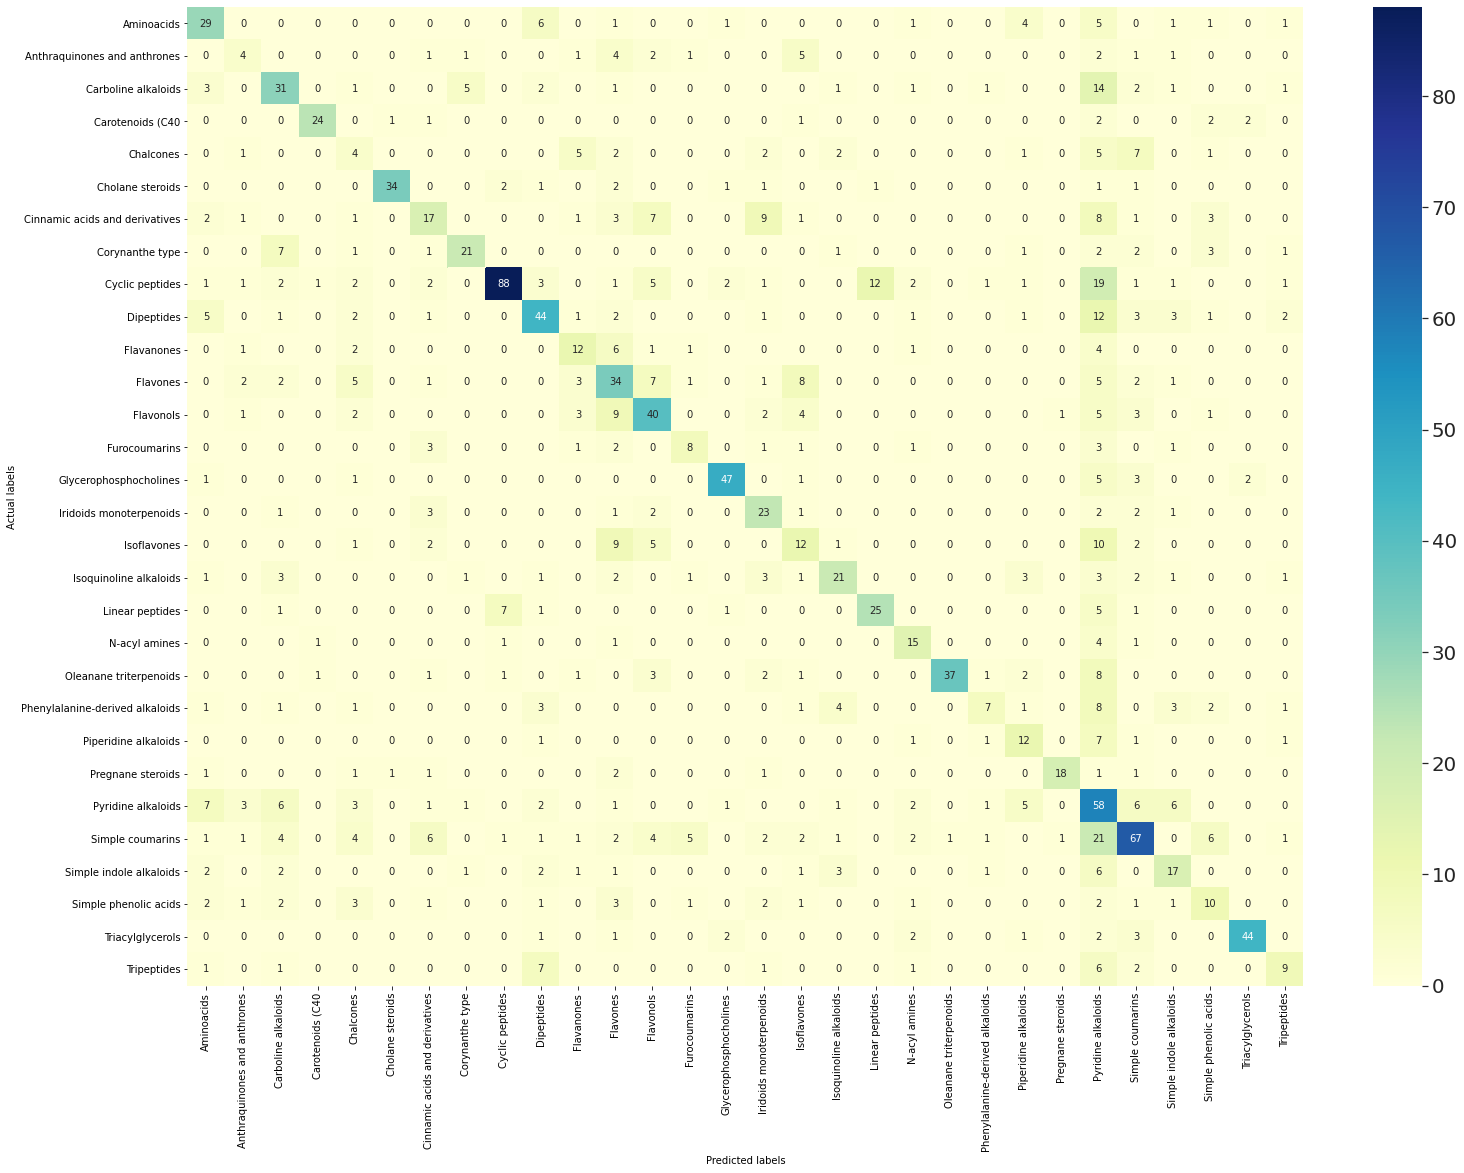

In [19]:
# Plot Confusion matrix
plt.figure(figsize = (25,18))
ax= plt.subplot()
df_cm = pd.DataFrame(conf_mat, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual labels'
df_cm.columns.name = 'Predicted labels'
sns.set(font_scale=1.8)
sns.heatmap(df_cm, annot=True, ax = ax, cmap="YlGnBu", fmt='d',annot_kws={"size": 10})



## tSNE plot (Remove this whole part)

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [85]:
## The number of different class labels
len(set(y_label_list))

438

In [84]:
## Reduce features into 2 dimensions
lda_reduce = LinearDiscriminantAnalysis(n_components=2)
X_r2_lda = lda_reduce.fit(X_embedding, y_label).transform(X_embedding)
ld1=X_r2_lda[:,0]
ld2=X_r2_lda[:,1]

# Print the number of features
print('Original number of features:', X_embedding.shape[1])
print('Reduced number of features:', X_r2_lda.shape[1])


Original number of features: 300
Reduced number of features: 2


In [91]:
X_r2_lda.shape

(16360, 2)

In [99]:
import seaborn as sns
import pandas as pd

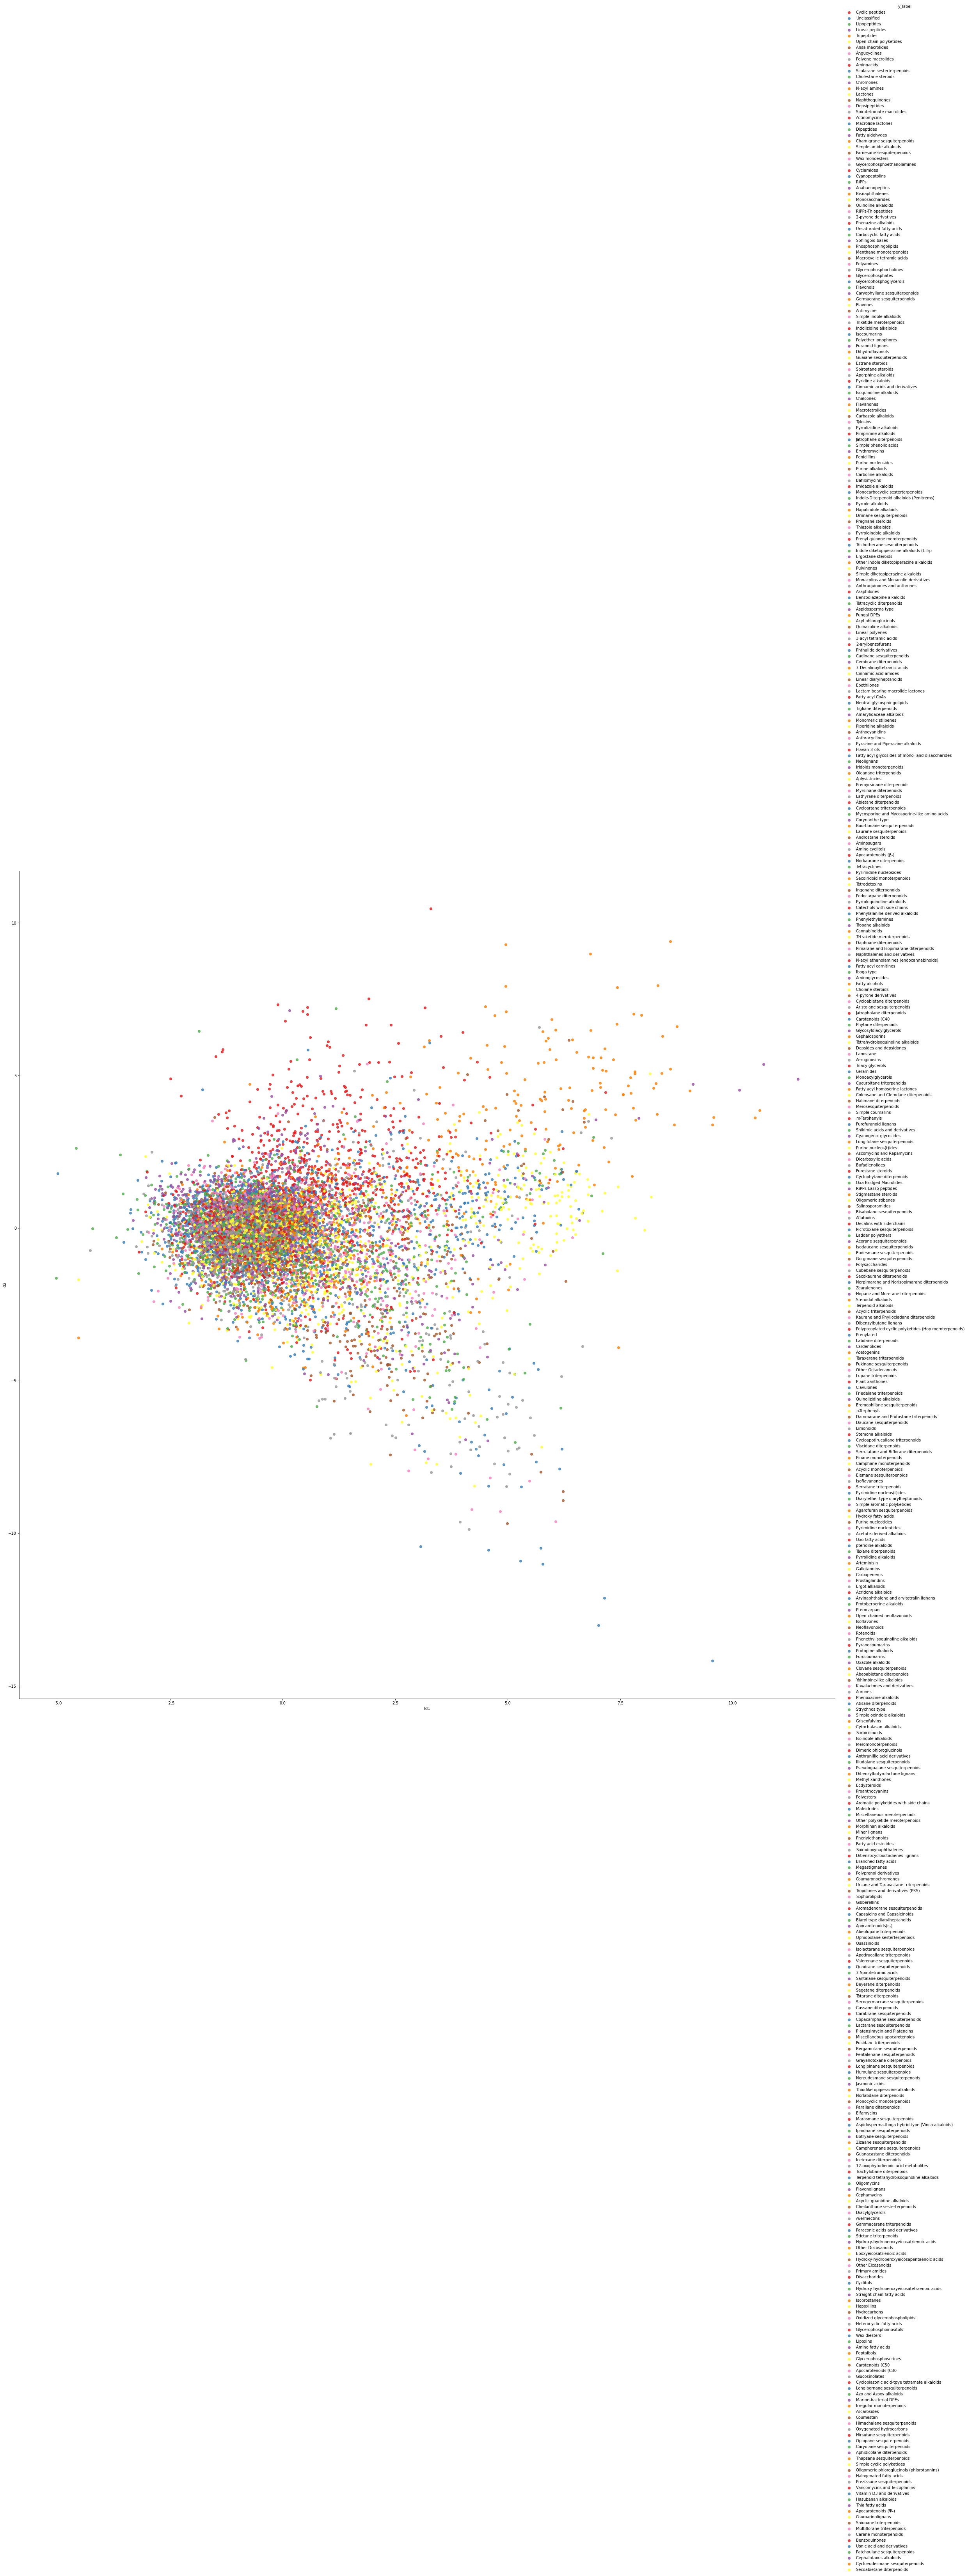

In [107]:
df = pd.DataFrame(dict(ld1=X_r2_lda[:,0],ld2=X_r2_lda[:,1],y_label=y_label_list))

sns.lmplot(x='ld1',y='ld2', data=df, hue='y_label', height=30, fit_reg=False, palette="Set1")
plt.show()

In [ ]:
X_2_fea = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_embedding, y_label)
print(X_2_fea.shape)
lbs = list(dict.fromkeys(y_label_list))
cl=[]
for i in range(len(y_label_list)):
    lb_index=lbs.index(y_label_list[i])
    cl.append(lb_index)
print(len(cl))
print(cl[:10])
plt.scatter(X_2_fea[:,0], X_2_fea[:,1],label=cl)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Mass Spectral Embeddings reduced by 2 components')

plt.show()